<a href="https://colab.research.google.com/github/12112003varun/varun/blob/main/exp_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{{hlist|Electronics|Movies and music|Home and furniture|Home improvement|Clothing|Footwear|Jewelry|Toys|Health and beauty|Pet supplies|Sporting goods and fitness|Auto|Photo finishing|Craft supplies|Party supplies|Grocery}}


{{Unbulleted list
  | [[Crude oil]]
  | [[Oil products]]
  | [[Natural gas]]
  | [[Petrochemical]]s
  | [[Power generation]]}}


[[Investment|Diversified investments]], [[Insurance#Types|Property & casualty insurance]], [[Public utility|Utilities]], [[Restaurants]], [[Food processing]], [[Aerospace]], [[Toys]], [[Mass media|Media]], [[Automotive industry|Automotive]], [[Sports equipment|Sporting goods]], [[Final good|Consumer products]], [[Internet]], [[Real estate]]


['home', 'electronics', 'sporting goods', 'beauty', 'music', 'party supplies', 'grocery', 'home improvement', 'jewelry', 'clothing', 'furniture', 'photo finishing', 'health', 'craft supplies', 'toys', 'pet supplies', 'auto', 'fitness', 'footwear', 'movies', 'petrochemicals', 'crude oil', 'power gener

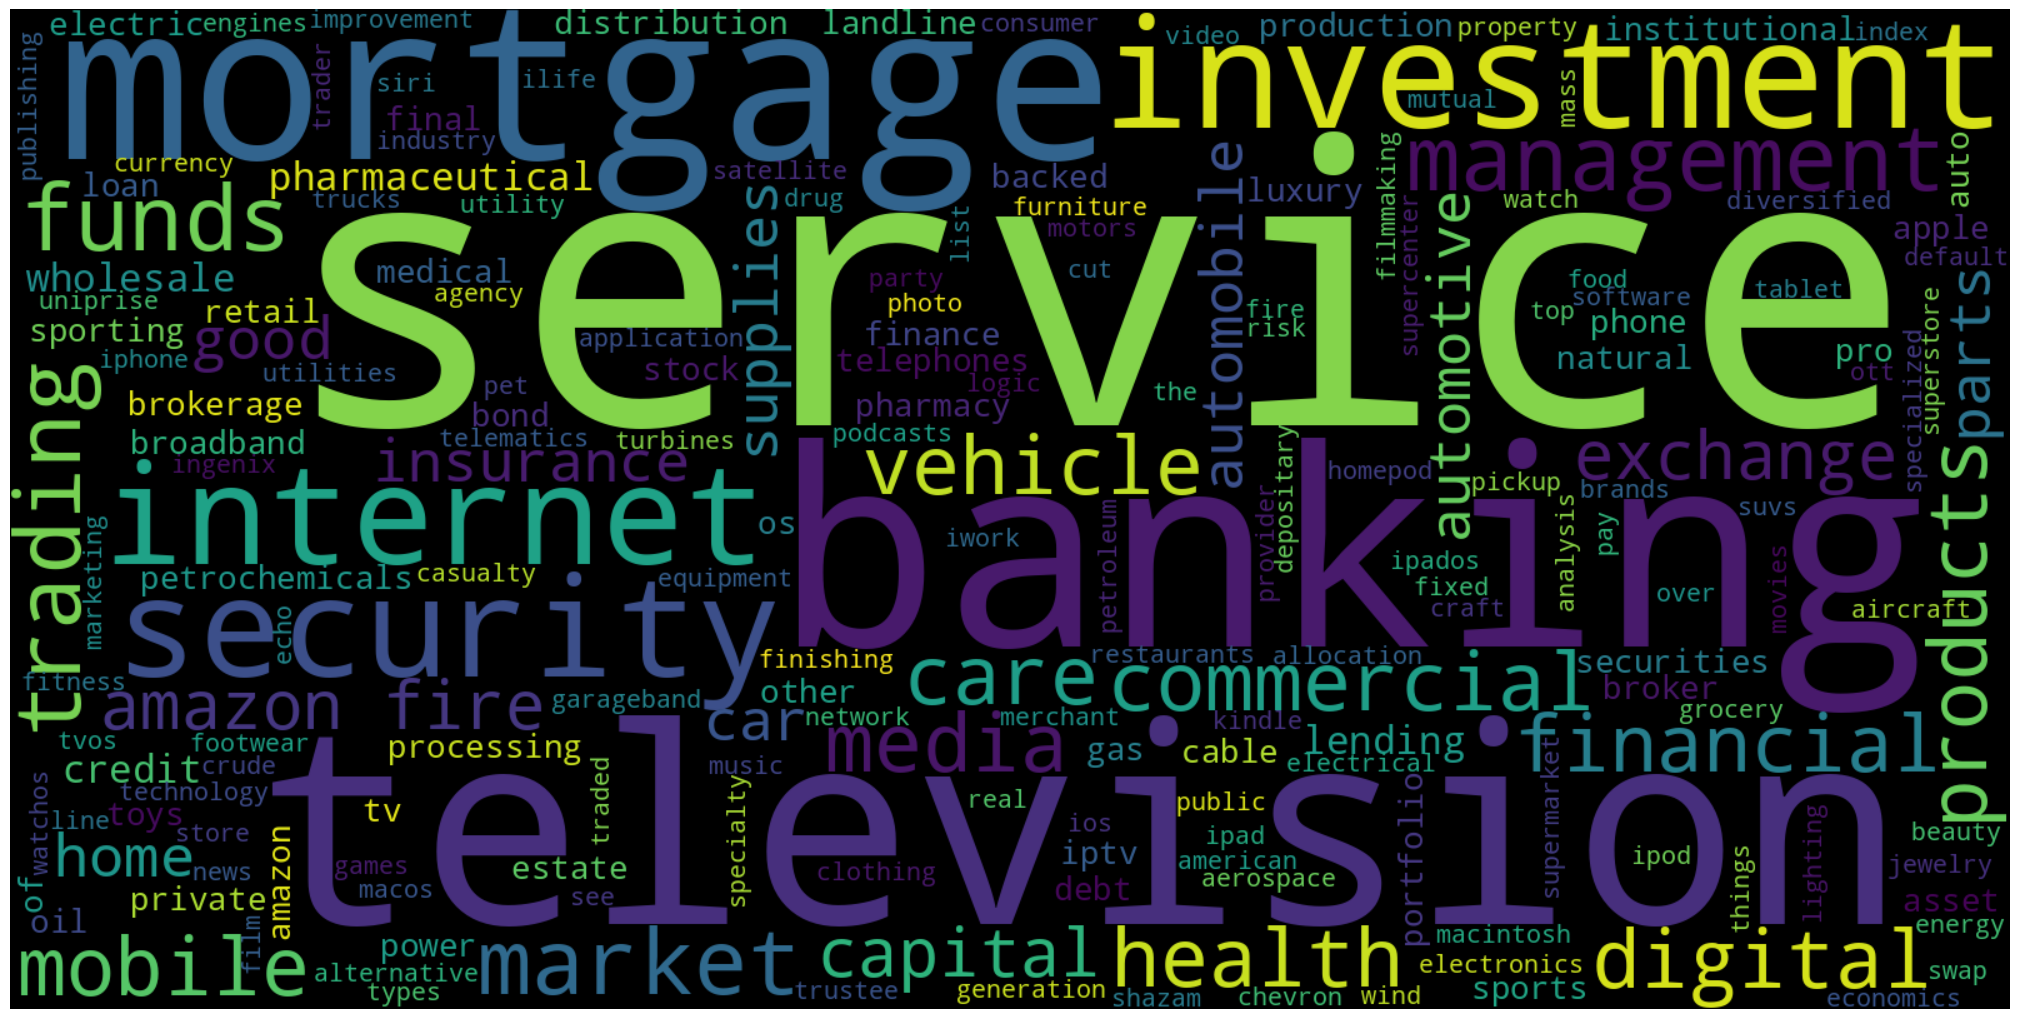

[[Retail]]
[[Energy industry|Energy]]: [[Oil and gas industry|Oil and gas]]
[[Conglomerate (company)|Conglomerate]]
{{Unbulleted list | [[Computer hardware]] | [[Computer software]] | [[Consumer electronics]] | [[Cloud computing]] | [[Digital distribution]] | [[Fabless manufacturing|Fabless silicon design]] | [[Semiconductors]] | [[Financial technology]] | [[Artificial intelligence]]}}
[[Managed health care]]
['retail', 'energy industry', 'gas industry', 'energy', 'gas', 'oil', 'company', 'conglomerate', 'fabless silicon design', 'artificial intelligence', 'semiconductors', 'consumer electronics', 'fabless manufacturing', 'computer hardware', 'cloud computing', 'digital distribution', 'financial technology', 'computer software', 'managed health care', 'healthcare', 'retail', 'health care', 'artificial intelligence', 'grocery stores', 'e-commerce', 'cloud computing', 'digital distribution', 'consumer electronics', 'telecommunications industry', 'technology', 'technology company', 'telec

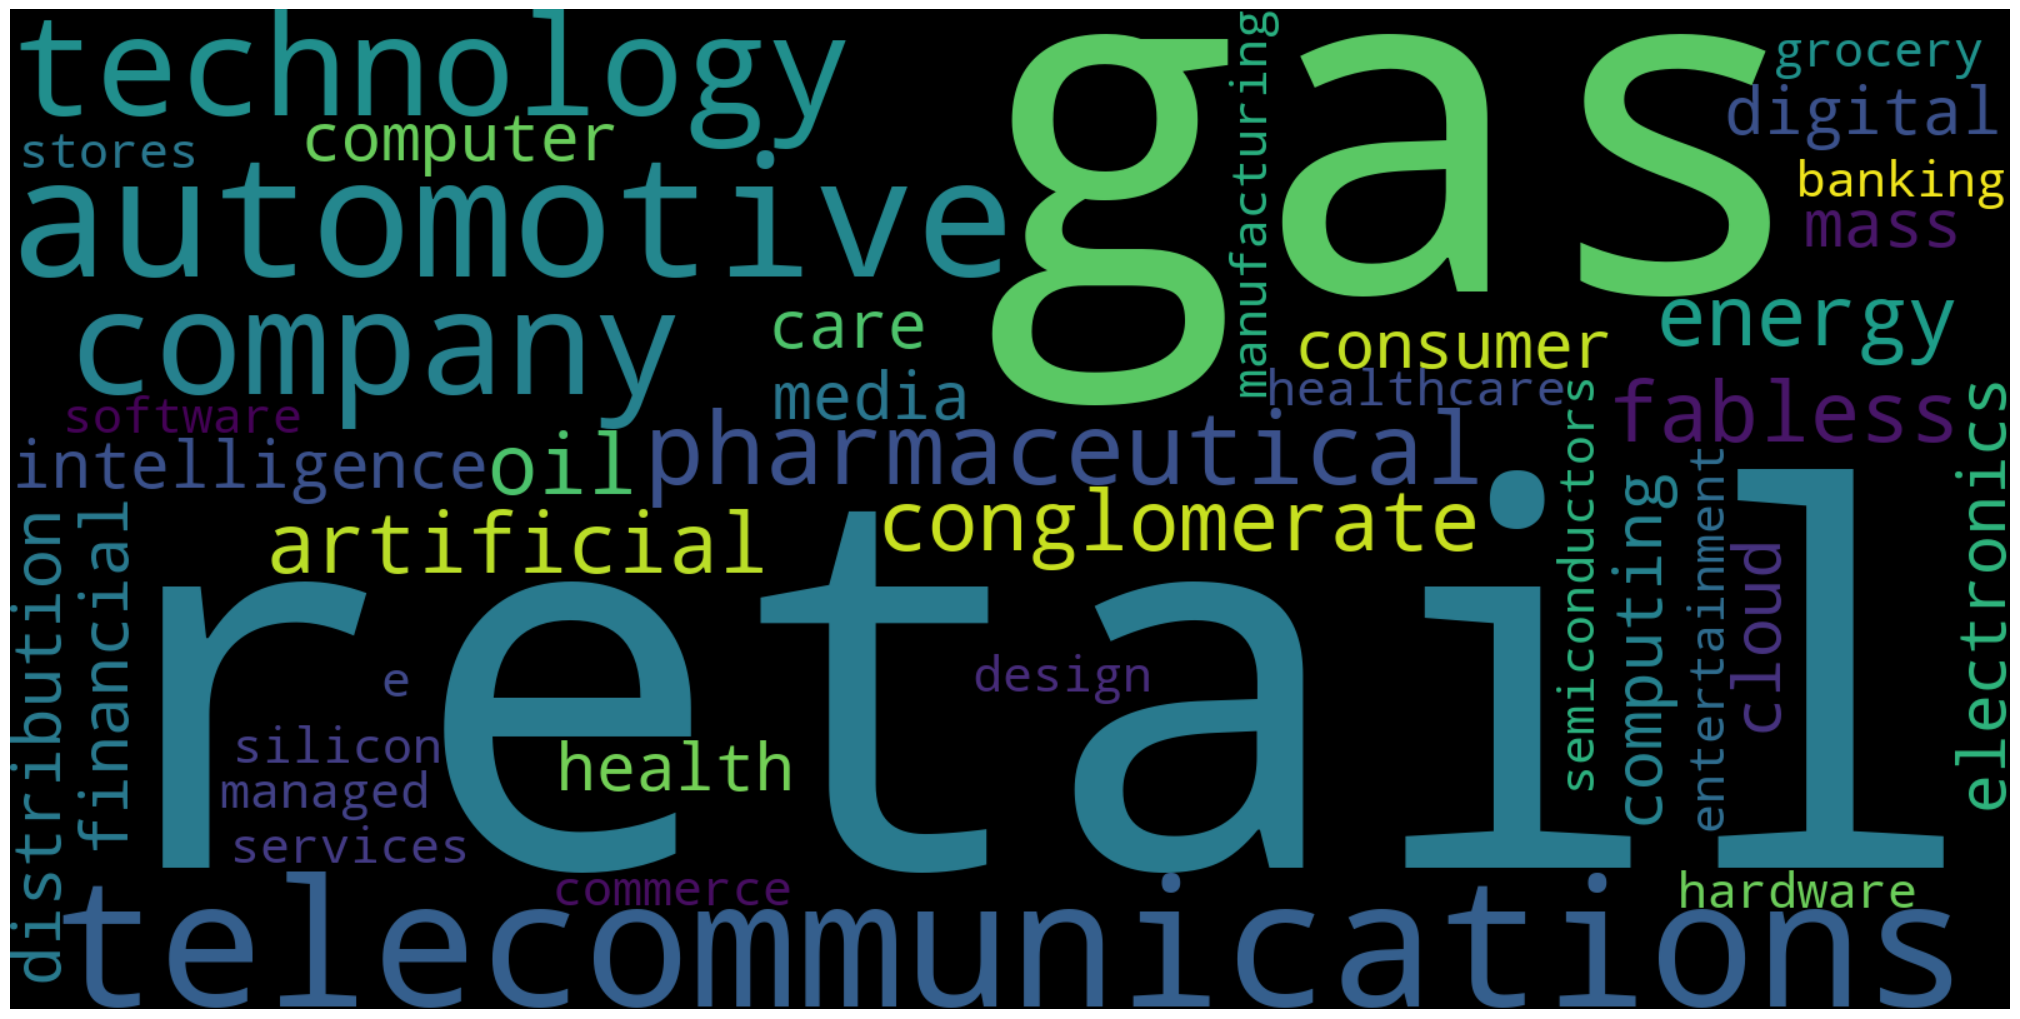

{{increase}} {{US$|219.295 billion}} (2019)
{{Nowrap|Decrease| |US$|346.2 billion|ref| name="201310K"}} {{Decrease}} {{US$|346.2 billion}}
{{increase}} US$707.8 billion (2018)
{{Decrease}} {{US$|338.516&nbsp;billion}}
{{increase}} $173.889 billion (2019)
{{nowrap|increase| |US$|60.381 billion| |small|(2018)|ref| name=FY}} {{increase}} {{US$|60.381 billion}} {{small|(2018)}}
{{increase}} {{US$|196.456 billion}}
{{decrease}} {{US$|162.648 billion}}
{{increase}} {{US$|link|=|yes}} 531 billion     (2018)
{{increase}} US$227.339 billion {{small|(2018)}}
{{decrease}} {{US$|256.54 billion}} {{small|(2018)}}
{{increase}} {{US$|37.66 billion}} (2018)
{{decrease}} {{US$|253.9 billion}} {{small|(2018)}}
{{increase}} US$39.95 billion {{small|(2018)}}
{{increase}} US$45.40 billion
{{increase}} {{US$|264.82 billion}}
{{increase}} {{US$|38.11 billion}} (2019)
{{nowrap|Decrease| US$ 309.129 billion |small|(2018)}} {{Decrease}} US$ 309.129 billion {{small|(2018)}}
{{decrease}} {{US$|67.59 billion}}
{{i

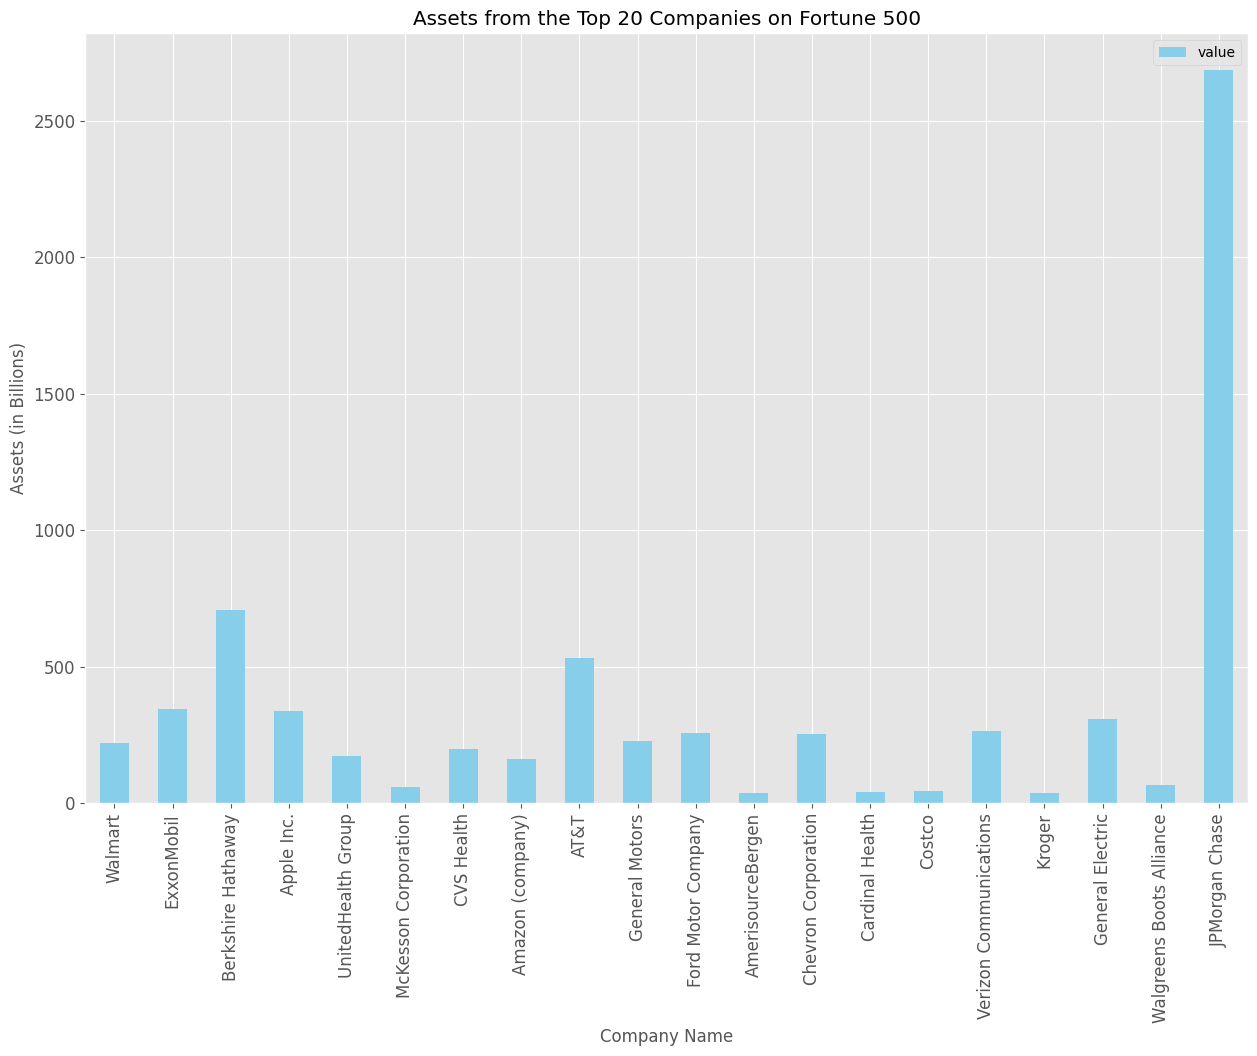

In [1]:
#Exp-2 Wrangling and Analysis Solution
#varunteja - 9921005065
import re
import json
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import urllib.request
url = 'https://raw.githubusercontent.com/MonashDataFluency/python-web-scraping/master/data/infoboxes.json'
urllib.request.urlretrieve(url, 'infoboxes.json')
with open('infoboxes.json', 'r') as file:
  wiki_data = json.load(file)
wiki_data[0]
for i in range(0,3):
 print(wiki_data[i]['products'])
 print('\n')
regex = re.compile(r'[\w\s-]+')
rogue_words = ['unbulleted list', 'hlist', 'flat list', 'flatlist', 'plainlist', 's', 'br', '']
products = []
data = []
for x in wiki_data:
  product = x['products'].lower()
  product = product.replace(' and ', '|').replace(']]', '')
  product = regex.findall(product) # extract all alphanumeric occurences
  product = [p.strip() for p in product] # get rid of leading or trailing whitespace
  # filter rogue words and de-duplicate
  product = list(set([p for p in product if p not in rogue_words]))
  # add to data
  data.append({'wiki_title' : x['company_name'], 'product' : ', '.join(product)})
  # add to list of products
  products.extend(product)
print(products)

def create_wordcloud(items, stopwords=[]):
  text = ' '.join(items)
  wordcloud = WordCloud(width=1600, height=800, margin=0, stopwords=stopwords).generate(text)
  plt.figure( figsize=(20,10))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis("off")
  plt.tight_layout(pad=0)
  plt.show()
create_wordcloud(products)
for i in range(0,5):
  print(wiki_data[i]['industry'])
  industries = []
for i, x in enumerate(wiki_data):
  industry = x['industry'].lower()
  industry = industry.replace(' and ', '|').replace(']]', '')
  industry = regex.findall(industry)
  industry = [i.strip() for i in industry]
  industry = list(set([i for i in industry if i not in rogue_words]))
  data[i]['industry'] = ', '.join(industry)
  industries.extend(industry)
print(industries)
create_wordcloud(industries, ['industry']) # adding "industry" to the stopword list
for i in range(0,len(wiki_data)):
  print(wiki_data[i]['assets'])
  regex1 = re.compile('([\d\.]+)')
  regex2 = re.compile('(billion|trillion)')
  assets = []
for i, x in enumerate(wiki_data):
  y = x['assets'] # get assets
  z = regex1.findall(y)[0] # extract assets
  unit = regex2.findall(y)[0] # extract the unit
  asset = float(z) # convert to the numeric
  data[i]['assets'] = str(asset) + ' ' + unit # add to data
  # add to list of assets
  assets.append({'company' : x['company_name'], 'value' : asset, 'unit' : unit})
assets
for i, asset in enumerate(assets):
  if asset['unit'] == 'trillion':
    assets[i]['value'] = asset['value'] * 1000
    assets[i]['unit'] = 'billion'
df_assets = pd.DataFrame(assets)
df_assets
ax = df_assets.plot(kind='bar', title ="Assets from the Top 20 Companies on Fortune 500",color='skyblue',figsize=(15, 10), legend=True, fontsize=12)
ax.set_xticklabels(df_assets.company)
ax.set_xlabel("Company Name", fontsize=12)
ax.set_ylabel("Assets (in Billions)", fontsize=12)
plt.show()
df_wiki = pd.DataFrame(data)
df_wiki.head()
url = 'https://raw.githubusercontent.com/MonashDataFluency/python-web-scraping/master/data/fortune_500_companies.csv'
urllib.request.urlretrieve(url, 'fortune_500_companies.csv')
df = pd.read_csv('fortune_500_companies.csv', nrows=20)
df = pd.concat([df, df_wiki], axis=1)
df
df.to_csv('top_20_companies.csv', index=False)
#varunteja - 9921005065

In [2]:
#Exp 3 Customer Churn Prediction
#varunteja - 9921005065
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
np.random.seed(42)
data_size = 1000
X = pd.DataFrame({
'Age': np.random.randint(18, 65, data_size),
'MonthlySpend': np.random.uniform(20, 200, data_size),
'ContractLength': np.random.randint(1, 24, data_size),
'CustomerSatisfaction': np.random.randint(1, 5, data_size)})
X['Churn'] = np.random.choice([0, 1], data_size, p=[0.8, 0.2])
X_train, X_test, y_train, y_test = train_test_split(X.drop('Churn', axis=1), X['Churn'], test_size=0.2,random_state=42)
Clf = RandomForestClassifier(random_state=42)
Clf.fit(X_train, y_train)
y_pred = Clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report: ")
print(classification_report(y_test, y_pred))

Accuracy: 0.81

Classification Report: 
              precision    recall  f1-score   support

           0       0.82      0.97      0.89       163
           1       0.38      0.08      0.13        37

    accuracy                           0.81       200
   macro avg       0.60      0.53      0.51       200
weighted avg       0.74      0.81      0.75       200



In [3]:
#Exp-4 Customer sentiment analysis
#varunteja - 9921005065
import nltk
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
def analyze_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    return sentiment_label, sentiment_polarity, sentiment_subjectivity
customer_review = "I hate this product"
sentiment_label, sentiment_polarity, sentiment_subjectivity = analyze_sentiment(customer_review)
print(f"Customer Review: {customer_review}")
print(f"Sentiment: {sentiment_label}")
print(f"Sentiment Polarity: {sentiment_polarity}")
#varunteja - 9921005065

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


Customer Review: I hate this product
Sentiment: Negative
Sentiment Polarity: -0.8
